# Heart Disease Statistics Assignment 3

## Authors: Nicholas Tam

## Group: 4

### Dataset and Project Question
For our research project, we have selected datasets containing processed angiography data on patients in various clinics in 1988, applying a probability model derived from test results of 303 patients at the Cleveland Clinic in Cleveland, Ohio to generate and estimate results for the diagnosis of coronary heart disease (Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R., 1989). The datasets include the following patients undergoing angiography: 
- 303 patients at the Cleveland Clinic in Cleveland, Ohio (Original dataset for model) 
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from the University Hospitals in Zurich and Basel, Switzerland

These datasets were retrieved from the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from UCI machine learning repository, and converted from .data files to CSV files with Excel. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: 

In [1]:
myTable <- data.frame(
  Variable = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
  Definition = c("Age", "Sex", "Chest pain type", "Resting blood pressure on admission to hospital", "Serum cholesterol", "Presence of high blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "ST depression induced by exercise relative to rest", "Slope of the peak exercise ST segment", "Number of major vessels coloured by fluoroscopy", "Presence of defect", "Diagnosis of heart disease"),
  Type = c("Continuous", "Categorical", "Categorical", "Continuous", "Continuous", "Categorical", "Categorical", "Continuous", "Categorical", "Continuous", "Categorical", "Continuous", "Categorical", "Categorical"),
  Unit = c("Years", "N/A", "N/A", "mmHg", "mg/dl", "N/A", "N/A", "BPM", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"),
  Categories = c("N/A", "0: Female; 1: Male", "1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic", "N/A", "N/A", "0: False; 1: True", "0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria", "N/A", "0: No; 1: Yes", "N/A", "1: Upsloping; 2: Flat; 3: Downsloping", "Range from 1-3", "3: Normal; 6: Fixed defect; 7: Reversable defect", "0: < 50% diameter narrowing; 1+: > 50% diameter narrowing")
)
myTable

Variable,Definition,Type,Unit,Categories
<chr>,<chr>,<chr>,<chr>,<chr>
age,Age,Continuous,Years,N/A
sex,Sex,Categorical,N/A,0: Female; 1: Male
cp,Chest pain type,Categorical,N/A,1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic
trestbps,Resting blood pressure on admission to hospital,Continuous,mmHg,N/A
chol,Serum cholesterol,Continuous,mg/dl,N/A
fbs,Presence of high blood sugar,Categorical,N/A,0: False; 1: True
restecg,Resting electrocardiographic results,Categorical,N/A,0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach,Maximum heart rate achieved,Continuous,BPM,N/A
exang,Exercise induced angina,Categorical,N/A,0: No; 1: Yes


My project question is: 
#### "Given the sample data for angiography patients, is cholesterol level associated with age, and does the association differ between different locations?" 

Previous studies have indicated a positive association between cholesterol level and age, where total cholesterol levels steadily increase from age 20 to 65, followed by a slight decrease in men and a plateu in women (Beckett, N., Nunes, M., & Bulpitt, C., 2000). Another study has indicated a positive correlation between serum cholesterol and heart rate, along with a significant inverse association between heart rate and HDL-cholesterol levels (Wannamethee, G., & Shaper, A. G., 1994). A study in the US has also identified a low-order, positive relationship of dietary cholesterol intake to systolic blood pressure (Sakurai, M., Stamler, J., Miura, K., Brown, I. J., Nakagawa, H., Elliott, P., Ueshima, H., Chan, Q., Tzoulaki, I., Dyer, A. R., Okayama, A., Zhao, L., & INTERMAP Research Group, 2011). As such, gender and heart rate may be confounding variables for this question. However, it is unclear how the locations of each clinic influence the change in cholesterol levels.

There are 4 separate datasets dependent on location, and thus can be modified to contain a new variable `location` indicating their respective location. However, the `chol` column for the Switzerland dataset does not contain any valid values, and thus the Switzerland dataset may need to be excluded. A multiple linear regression model can be applied with the `location`, `age`, and `chol` variables, allowing a prediction on the difference in association between cholesterol level and age between different locations.

Given the project question and the limitations of the given data, the following hypothesis test is to be conducted: 
- $H_0: \text{There is no significant difference in the association of cholesterol level with age between each location}$ 
- $H_1: \text{There is a significant difference in the association of cholesterol level with age between at least 1 pair of locations}$

<!-- Given the project question, let $\beta_{5}$ be the difference in reference line slope for Hungary compared to the reference line slope for Cleveland, and let $\beta_{6}$ be the difference in slope for the reference line for California compared to the reference line slope for Cleveland. The following hypothesis tests will be conducted: 

Hypothesis test 1:
- $H_0: \beta_{5} = 0$ 
- $H_1: \beta_{5} \neq 0$

Hypothesis test 2:
- $H_0: \beta_{6} = 0$ 
- $H_1: \beta_{6} \neq 0$ -->

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [2]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
library(ggplot2) # Provides commands to create complex plots
library(GGally) # Provides correlation between variables
library(tidymodels) # Modelling with training and testing
library(car) # Applied regression tools, including VIF
library(leaps) # Exhaustive search for the best subsets of the variables in x for predicting y in linear regression
library(glmnet) # Regularised regression models
library(mltools) # Regression metrics


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────

### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merged into a single dataframe called `total_heart`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing clinics that the probability model was applied to; the reference level is set to "Cleveland", the clinic the model was derived from.
- The `age`, `sex`, `cp`, `trestbps`, `chol`, `thalach`, and `num` columns require a change in data type to be used as intended.
- Due to several datasets either missing most or all data for `fbs`, `oldpeak`, `slope`, `ca` and `thal` columns, the columns have been removed under the assumption that they are irrelevant.
- Any patients with "?" for any variables, `trestbps == 0` or `chol == 0` are assumed to be invalid and have been removed.
    - The Switzerland dataset has `chol == 0` for all data and as such has been removed.
- Any values of `num >= 1` provide the same result, and thus have been converted to 1.

In [3]:
Cleveland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Cleveland.csv") %>% 
    mutate(location = "Cleveland")
Hungary_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Hungarian.csv") %>% 
    mutate(location = "Hungary")
Switzerland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_Switzerland.csv") %>% 
    mutate(location = "Switzerland")
California_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_VA.csv") %>% 
    mutate(location = "California")
total_heart <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num))  %>% 
    transform(sex = as.character(as.factor(sex)), cp = as.character(as.factor(cp)), trestbps = as.double(as.factor(trestbps)), chol = as.double(as.factor(chol)), thalach = as.double(as.factor(thalach)), num = as.character(as.factor(num))) 
# %>% 
total_heart$location <- factor(total_heart$location) %>% 
    relevel(total_heart$location, ref = "Cleveland")

head(total_heart)
tail(total_heart)

,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,Cleveland,63,1,1,34,81,2,48,0,0
2,Cleveland,67,1,4,43,134,2,6,1,1
3,Cleveland,67,1,4,16,77,2,27,1,1
4,Cleveland,37,1,3,25,98,0,84,0,0
5,Cleveland,41,0,2,25,52,2,70,0,0
6,Cleveland,56,1,2,16,84,0,76,0,0


,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
669,California,53,1,4,33,147,1,26,1,1
670,California,62,1,4,42,21,1,36,1,1
671,California,46,1,4,27,156,0,24,0,1
672,California,54,0,4,22,173,1,52,0,1
673,California,55,1,4,17,71,1,1,0,1
674,California,62,1,2,16,102,2,103,1,1


_Table 1: Initial dataset for all required data_

### 2.3. Exploratory Data Analysis

#### 2.3.1. Variance Inflation Factor (VIF) on variables
- VIF for each variable is calculated to test for multicollinearity. 
- `GVIF..1..2.Df..` is used for comparison due to different degrees of freedom for some variables.
- Horizontal line of VIF = 5 to indicate severe correlation of a variable with other variables.
- `GVIF..1..2.Df..` for all variables are significantly lower than 5, so multicollinearity between all variables is relatively low.

,GVIF,Df,GVIF..1..2.Df..,variable
,<dbl>,<dbl>,<dbl>,<chr>
location,2.173453,2,1.214193,location
age,1.469642,1,1.212288,age
sex,1.141094,1,1.068220,sex
cp,1.708278,3,1.093351,cp
trestbps,1.098069,1,1.047888,trestbps
restecg,1.605621,2,1.125669,restecg
thalach,1.165946,1,1.079790,thalach
exang,1.558238,1,1.248294,exang
num,1.744449,1,1.320776,num


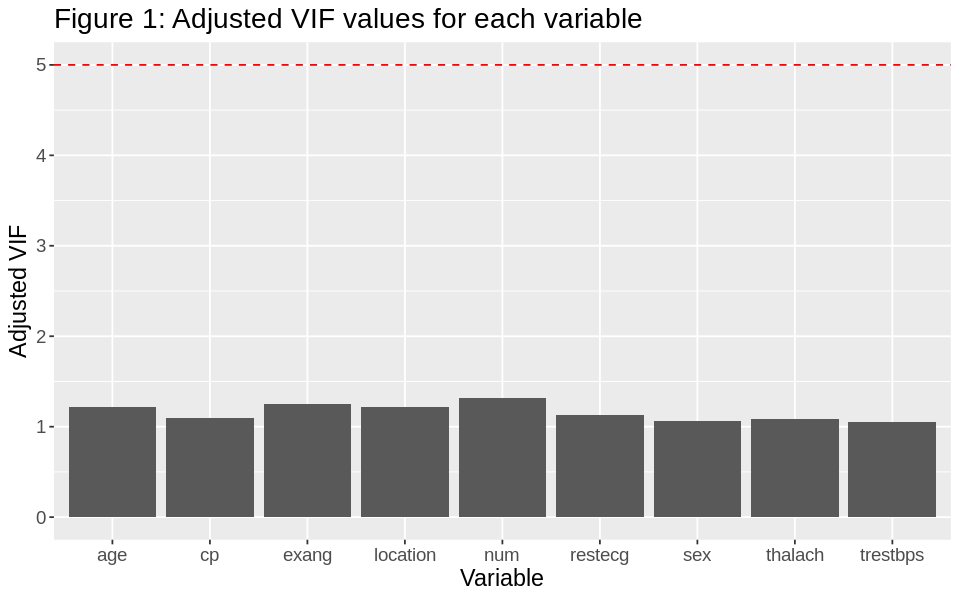

In [4]:
options(repr.plot.width = 8, repr.plot.height = 5)

total_heart <- total_heart %>% 
    select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num)
VIF_prep <- lm(chol ~ ., data = total_heart)
# vif(VIF_prep)
heart_MLR_add_inter_VIF <- data.frame(vif(VIF_prep))
heart_MLR_add_inter_VIF$variable <- c("location", "age", "sex", "cp", "trestbps", "restecg", "thalach", "exang", "num") 
heart_MLR_add_inter_VIF

# VIF graph
heart_MLR_add_inter_VIF_vis <- ggplot(heart_MLR_add_inter_VIF, aes(x = variable, y = GVIF..1..2.Df..)) +
    geom_bar(stat = "identity") +
    ggtitle("Figure 1: Adjusted VIF values for each variable") +
    labs(x = "Variable",y = "Adjusted VIF") + 
    geom_hline(yintercept = 5, linetype = "dashed", color = "red") +
    theme(text = element_text(size = 14))
heart_MLR_add_inter_VIF_vis

### 2.4. Summary statistics for explanatory and response variables
The data below consists of summary data for the overall population: 
- `total_heart_pop_data`: For each location, the mean (`heart_chol_mean`), standard deviation (`heart_chol_sd`), and median (`heart_chol_median`) of cholesterol level values, mean (`heart_age_mean`), standard deviation (`heart_age_sd`), and median (`heart_age_median`) of ages, and quantity (`n`) of patients are measured.

In [5]:
# Count number of each combination of year and location
countPatients <- total_heart %>% 
    group_by(location) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_heart_pop_data <- total_heart %>% 
    group_by(location) %>% 
    summarize(
        heart_chol_mean = mean(chol), 
        heart_chol_sd = sd(chol), 
        heart_chol_median = median(chol), 
        heart_age_mean = mean(age), 
        heart_age_sd = sd(age), 
        heart_age_median = median(age)
    ) %>% 
    inner_join(countPatients) 
total_heart_pop_data

Joining with `by = join_by(location)`


location,heart_chol_mean,heart_chol_sd,heart_chol_median,heart_age_mean,heart_age_sd,heart_age_median,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Cleveland,93.14191,44.43490,89,54.43894,9.038662,56,303
California,86.34314,43.69981,77,59.63725,7.968737,60,102
Hungary,95.07063,50.82042,91,47.75093,7.806023,49,269


## 3. Methods and Results

The dataset contains measurements for cholesterol levels in separate locations, and the VIF values for all explanatory variables are relatively low, allowing for variations in cholesterol levels due to potential confounding variables to be accounted for.

### 3.1. Regularised regression model

Regularised regression is applied to create an appropriate model, which can mitigate multicollinearity further by shrinking the coefficients involved. Due to numerous medical studies indicating multidirectional associations between multiple biological factors (e.g. Age, heart rate, blood pressure), all variables may influence the result, and thus Ridge regression is used to allow for better interpretability by shrinking less relevant variables while allowing all variables to contribute to the model.

To apply the Ridge regression model, it is assumed that the relationship between `chol` and the other variables is relatively linear, each observation is independent of one another, the variables are homoscedastic, and the residuals of the model are normally distributed. 

The Ridge regression model may not effectively fit to the data, due to a significant portion of the variables being categorical, which may lead to additional issues such as additional multicollinearity, difficulty in handling new categories that may not be present in the testing data, or difficultly in interpreting the impact of individual categories due to havig multiple coefficients. The model may also be less effective than the full model if the relationship between `chol` and the other variables is not relatively linear.

In [6]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Splitting of data 
total_heart_split <- initial_split(total_heart, prop = 0.6, strata = chol)
training_total_heart <- training(total_heart_split)
testing_total_heart <- testing(total_heart_split)

# Creation of matrices
total_heart_X_train <- as.matrix(training_total_heart[,-6])
total_heart_Y_train <- as.matrix(training_total_heart[,6])
head(total_heart_X_train)

total_heart_X_test <- as.matrix(testing_total_heart[,-6])
total_heart_Y_test <- as.matrix(testing_total_heart[,6])

location,age,sex,cp,trestbps,restecg,thalach,exang,num
Cleveland,60,1,4,25,2,30,1,1
Cleveland,40,1,4,8,2,12,1,1
Cleveland,43,1,4,16,2,18,1,1
Cleveland,51,1,3,8,0,21,0,0
Cleveland,53,1,3,25,2,50,0,0
Cleveland,41,0,2,5,0,66,0,0


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

NULL

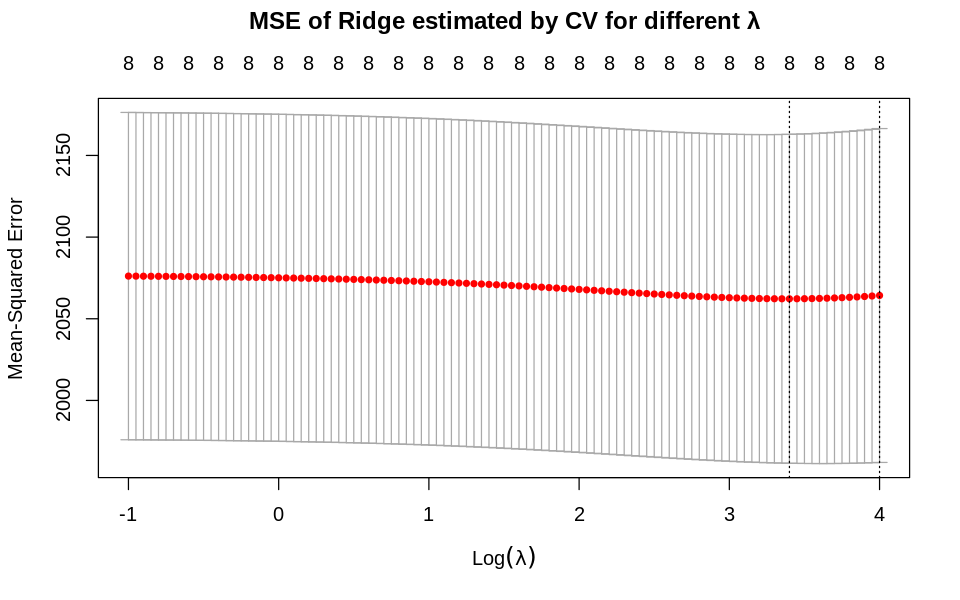

In [7]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Cross validation to select smallest lambda 
total_heart_cv_lambda_ridge <- cv.glmnet(
  x = total_heart_X_train, y = total_heart_Y_train,
  alpha = 0,
  lambda = exp(seq(-1, 4, 0.05))
)

total_heart_cv_lambda_ridge_plot <- plot(total_heart_cv_lambda_ridge, main = "MSE of Ridge estimated by CV for different λ\n\n") 
total_heart_cv_lambda_ridge_plot
# log(total_heart_cv_lambda_ridge$lambda.min)

In [8]:
# Set seed for consistent results
set.seed(1234567890) # DO NOT CHANGE!

# Comparing the estimated regression coefficients of Ridge regression model with full model
total_heart_reg_coef <- cbind(
    Full_OLS = coef(lm(chol ~ ., data = training_total_heart)), 
    Ridge_min = as.vector(coef(total_heart_cv_lambda_ridge, s = total_heart_cv_lambda_ridge$lambda.min))
) %>% 
    as.data.frame()
total_heart_reg_coef

# Comparing RMSE of test sets derived from (out-of-sample) predicted `chol` values for each model
fat_R_MSE_models <- rbind(
    tibble(
        Model = "OLS Full Regression",
        R_MSE = rmse(
            preds = predict(lm(chol ~ ., data = training_total_heart), newdata = testing_total_heart),
            actuals = testing_total_heart$chol
        )
    ),
    tibble(
        Model = "Ridge Regression with minimum MSE",
        R_MSE = rmse(
            preds = predict(total_heart_cv_lambda_ridge, newx = total_heart_X_test, s = total_heart_cv_lambda_ridge$lambda.min),
            actuals = testing_total_heart$chol
        )
    )
)
fat_R_MSE_models

Warning message in cbind(Full_OLS = coef(lm(chol ~ ., data = training_total_heart)), :
“number of rows of result is not a multiple of vector length (arg 2)”


,Full_OLS,Ridge_min
,<dbl>,<dbl>
(Intercept),49.98891361,76.59567536
locationCalifornia,-11.56248143,0.00000000
locationHungary,6.57273087,0.13818241
age,0.44965521,-7.65682647
sex1,-11.55082529,1.84811506
cp2,12.99946568,0.14968346
cp3,-0.45817615,0.54730266
cp4,15.58537738,0.00237759
trestbps,0.23910733,4.41857925


Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


Model,R_MSE
<chr>,<dbl>
OLS Full Regression,47.56003
Ridge Regression with minimum MSE,47.95361


## References
- Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1988, June 30). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9
- Beckett, N., Nunes, M., & Bulpitt, C. (2000). Is it advantageous to lower cholesterol in the elderly hypertensive?. Cardiovascular drugs and therapy, 14(4), 397–405. https://doi.org/10.1023/a:1007812232328
- Wannamethee, G., & Shaper, A. G. (1994). The association between heart rate and blood pressure, blood lipids and other cardiovascular risk factors. Journal of cardiovascular risk, 1(3), 223–230. https://doi.org/10.1177/174182679400100307
- Sakurai, M., Stamler, J., Miura, K., Brown, I. J., Nakagawa, H., Elliott, P., Ueshima, H., Chan, Q., Tzoulaki, I., Dyer, A. R., Okayama, A., Zhao, L., & INTERMAP Research Group (2011). Relationship of dietary cholesterol to blood pressure: the INTERMAP study. Journal of hypertension, 29(2), 222–228. https://doi.org/10.1097/HJH.0b013e32834069a5